# Mecánica clásica

Aunque el método de Euler y todos los otros métodos que veamos se pueden utilizar para cualquier sistema de ecuaciones diferenciales ordinarias, en la Física Computacional las ecuaciones más comunes a resolver son las **ecuaciones de movimiento** de Mecánica Clásica. En la Mecánica Clásica, describimos el movimiento de un objeto especificando su posición espacial a través de alguna **coordenada** (posición en $x,y$, ángulo $\theta$, etc.) **como función del tiempo** $t$.

Las coordenadas de nuestro objeto son **funciones** del tiempo. Las ecuaciones de movimiento son las ecuaciones diferenciales que obedecen dichas coordenadas de nuestro objeto. Existen diversas formas de obtener las ecuaciones de movimiento (las más importantes siendo la mecánica Newtoniana, Lagrangiana o Hamiltoniana) para un sistema de interés. 

Independientemente del método que utilizemos para obtener las ecuaciones, siempre (solo no se cumple en casos muy particulares) siempre llegamos a ecuaciones diferenciales de segundo orden para cada una de las coordenadas, que se pueden convertir en sistemas de dos ecuaciones de primer orden para cada coordenada. Para muchos sistemas interesantes, como el péndulo real, péndulo doble o un sistema de $n$ cuerpos, **es imposible encontrar una expresión analítica para las coordenadas**. Así, estamos forzados a utilizar métodos numéricos para estimar la solución.

Algunos ejemplos importantes de sistemas en mecánica son:

* **Péndulo real con resistencia del aire lineal**

Tenemos un objeto de masa $m$ pegado a una cuerda sin masa, de longitud constante $l$, sujeto a un campo gravitatorio con aceleración constante $g$ y que forma un ángulo $\theta(t)$ respecto al eje $y$ negativo, como se muestra en la siguiente figura


<img src="https://i.stack.imgur.com/q0X6bm.jpg" width = 300>
El ángulo $\theta(t)$ obedece la siguiente [ecuación de movimiento](https://en.wikipedia.org/wiki/Pendulum):

$$
\frac{d^2 \theta}{dt^2} = - \gamma \frac{d \theta}{dt} - \frac{g}{l} \sin{\theta}
$$

Con $\gamma>0$ una constante arbitraria.

* **Tiro parabólico con resistencia del aire lineal**

Tenemos un objeto de masa $m$ en dos dimensiones, descrito por sus coordenadas cartesianas $\mathbf{r}(t) = (x(t),y(t))$. El objeto tiene una velocidad inicial $\mathbf{v_0} = (v_{x0},v_{y0})$ con $v_{x0}>0$ y $v_{y0}>0$

<img src= "https://upload.wikimedia.org/wikipedia/commons/0/00/Ferde_hajitas3.svg" width=500>

La resistencia al aire se puede modelar de forma lineal como una fuerza proporcional a la velocidad:

$$
\mathbf{F}_{\text{aire}} = - b \mathbf{v} (t) = -b \frac{d\mathbf{r}}{dt}(t)
$$

con $b>0$ una constante positiva. Así, se obtienen las siguientes ecuaciones de movimiento para cada coordenada:

$$
\begin{align}
\frac{d^2 x}{dt^2} &=  - \frac{b}{m} \frac{dx}{dt} \\
\frac{d^2 y}{dt^2} &= - g - \frac{b}{m} \frac{dy}{dt} 
\end{align}
$$

* **Tiro parabólico con resistencia del aire cuadrática**

Si tenemos exactamente el mismo sistema pero ahora modelamos la resistencia del aire como 

$$
\begin{align}
\mathbf{F}_{\text{aire}} &= -c \Vert \mathbf{v} (t) \Vert^2 \hat{\mathbf{v}}(t) \\  
& \\
&= -c \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 }  \frac{d\mathbf{r}}{dt}(t)
\end{align}
$$

Con $c>0$ una constante positiva. Obtenemos ahora las siguientes ecuaciones de movimiento para las coordenadas

$$
\begin{align}
\frac{d^2 x}{dt^2} &=  - \frac{c}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 } \\
\frac{d^2 y}{dt^2} &= - g - \frac{c}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 }
\end{align}
$$

### Ejercicio 1

Convierte las ecuaciones de movimiento del péndulo real, tiro parabólico con resistencia lineal y tiro parabólico con resistencia cuadrática en sistemas de ecuaciones de primer orden.

Nota que para cada coordenada debe haber dos variables (velocidad y posición) y un sistema de dos ecuaciones de primer orden, una para cada variable. Así, para el péndulo real debes obtener un sistema de dos ecuaciones de primer orden con dos variables y para los otros sistemas un sistema de cuatro ecuaciones de primer orden con cuatro variables.

## Preludio Computacional: animaciones

Aunque una coordenada normalmente se puede ver como una función $x(t):\mathbb{R} \to \mathbb{R}$, que ya sabemos cómo graficar, nos gustaría mejor hacer una **animación** que simplemente nos mostrara el valor de la función $x(t)$ en distintos tiempos $t$.

En la paquetería `Plots`, realizar una animación es muy sencillo, como veremos a continuación. Simplemente ponemos la gráfica que queremos que forme cada cuadro de la animación dentro de un ciclo For y antes ponemos la palabra `@animate`

In [1]:
using Plots

### Ejemplo:  graficando una trayectoria en un círculo

Queremos graficar la trayectoria $\mathbf{r}(t) = (x(t),y(t)) = (\cos{(2\pi t)},\sin{(2 \pi t)})$

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\tmp.gif")
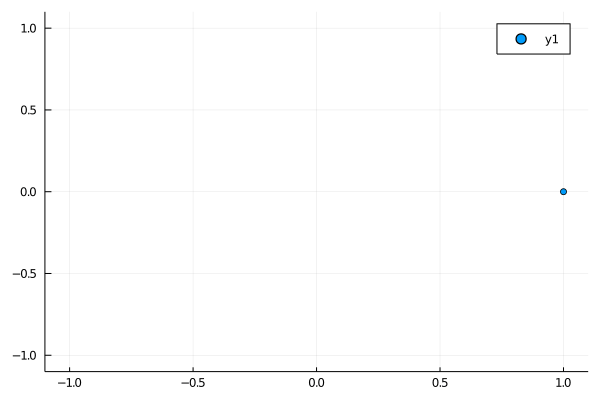

In [2]:
# tiempo final pensando que se la trayectoria inicia en t = 0
tf = 2.0
# numero de cuadros de la animación a generar
c = 100
tiempos = range(0,stop = tf, length = c)
# `@animate` crea un objeto de Plots en el que describimos una animación mediante cada cuadro
# guardamos dicho objeto en la variable `anim`
# dentro del ciclo for, debemos generar cada cuadro de la animación
anim = @animate for t in tiempos
    # grafica solamente el punto (cos(2*pi*t),sin(2*pi*t))
    scatter([cos(2*pi*t)],[sin(2*pi*t)])
    # fijamos los límites para que la gráfica se vea igual en cada cuadro
    xlims!(-1.1,1.1)
    ylims!(-1.1,1.1)
end
# convertimos los cuadros de la animación descrita en `anim` en un GIF
gif(anim)

Podemos camibiar los cuadros por segundo utilizando el argumento nombrado `fps`

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\tmp.gif")
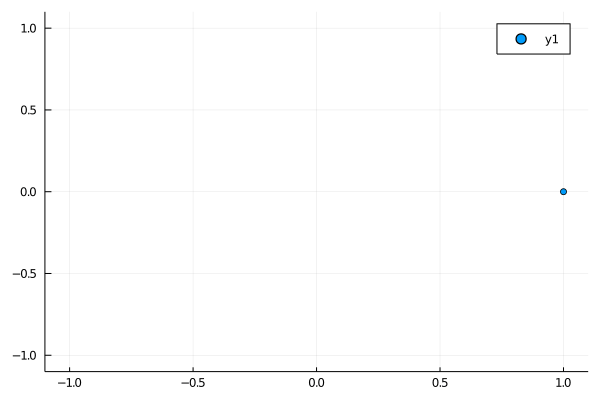

In [3]:
# 10 cuadros por segundo. Muy lento
gif(anim,fps=10)

Podemos guardar la animación poniendo un string con el nombre para guardar entre `anim` y `fps=10`

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\prueba.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\prueba.gif")
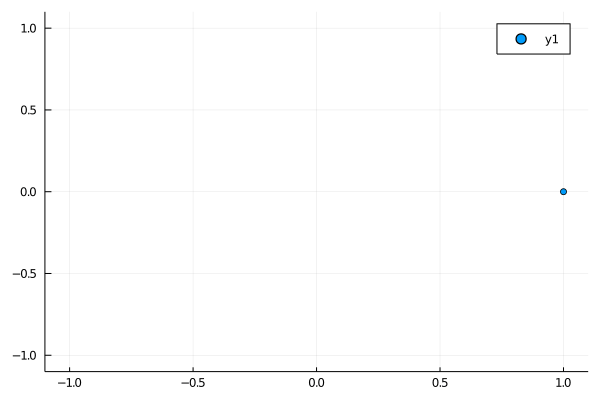

In [4]:
# 30 cuadros por segundo se ve muy bien
gif(anim,"prueba.gif",fps=30)

El gif se guardará en la misma ubicación donde está el Notebook.


Podemos utilizar esto también para graficar ondas o funciones que cambien con el tiempo.

In [5]:
function ondaViajera(x,t)
    return (sin(2*pi*(x-t)))/(2*pi*(x-t))
end

ondaViajera (generic function with 1 method)

In [6]:
tf = 3.0
c = 100
# defino el intervalo de valores de x en los que voy a graficar la función `ondaViajera`
# no hace falta definirlo dentro del ciclo pues no va a cambiar en cada cuadro
xs = range(-1,stop=3,length=200)
anim = @animate for t in range(0,stop = tf, length = c)
    # las ys están dadas por mi función `ondaViajera` y si cambian en cada cuadro
    # `t` está dado por el ciclo for. las `x` varían en el arreglo xs
    ys = [ondaViajera(x,t) for x in xs]
    plot(xs,ys)
    # `round(t,digits=2)` es una función que redondea la variable `t` para tener solo dos cifras decimales
    title!("Función animada. t = $(round(t,digits=2))")
    xlabel!("x")
    ylabel!("y")
    # fijamos los límites de la gráfica para que no cambien
    xlims!(-1,3)
    ylims!(-1,1)
end

Animation("C:\\Users\\sayeg\\AppData\\Local\\Temp\\jl_hhqyGp", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\tmp.gif")
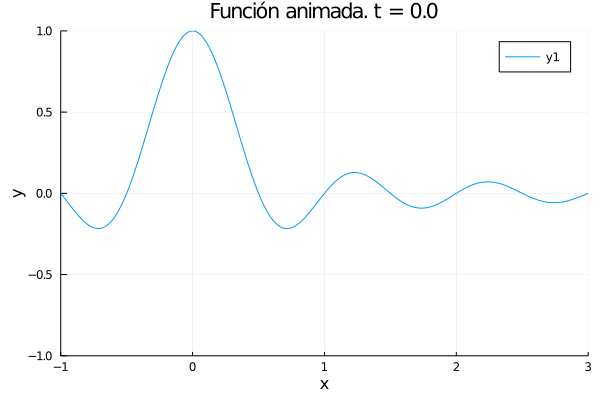

In [7]:
gif(anim,fps=30)

Podemos también iterar las posiciones que ya se encuentran en un arreglo en caso de que no podamos generar las nuestras en cada paso:

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\tmp.gif")
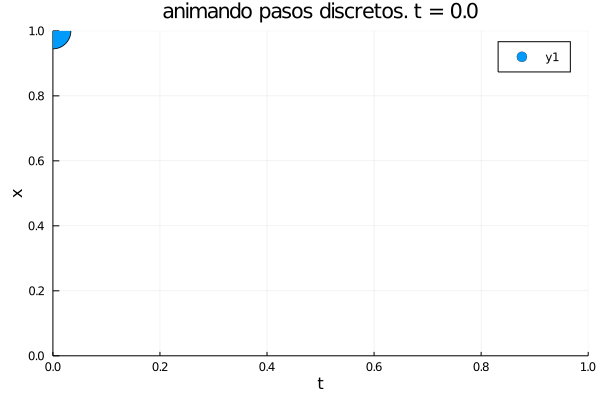

In [8]:
c = 100
tiempos = range(0,stop=1,length=c)
posiciones = [exp(-4t) for t in tiempos]
# iteramos sobre un índice `i` que nos permita acceder a los tiempos discretos 
# y a las posiciones discretas
anim = @animate for i in 1:c
    #  el argumento `markersize` nos permite aumentar el tamaño de los puntos
    scatter([tiempos[i]],[posiciones[i]],markersize=20)
    title!("animando pasos discretos. t = $(round(tiempos[i],digits=2))")
    xlabel!("t")
    ylabel!("x")
    xlims!(0,1)
    ylims!(0,1)
end
gif(anim,fps=30)

`@animate`, y cualquier otro comando que comienze con `@` es algo que en Julia se llama un **macro**. Un macro es una herramienta "mágica" que convierte código de Julia en otro código que hace algo ligeramente distinto. 

Podemos ahora resolver sistemas de mecánica clásica para obtener las coordenadas como función del tiempo y realizar una animación de la trayectoria de nuestros objetos

### Ejercicio 2

(i) Utiliza la función `eulerVec` de la clase pasada para resolver el sistema del péndulo real. Grafica $\theta(t)$, así como la velocidad $v_{\theta}(t)$. Realiza una animación de la trayectoria del péndulo. Usa condiciones iniciales y valores de paramétros arbitrarios (i.e escogidas por ustedes) pero que tengan **sentido físico** (i.e. que no sea $0$ la velocidad inicial y el ángulo inicial).

(ii) Fija $\gamma$ en un valor pequeño y resuélvelo para distintos valores de la longitud del péndulo $l$. ¿Cómo cambia el movimiento al cambiar la longitud?. Haz una animación donde compares distintas longitudes del péndulo con las mismas condiciones inciales.

(iii) Fija $l$ en un valor dado y resuélvelo para distintos valores de la resistencia $\gamma$. ¿Cómo cambia el movimiento al cambiar dicho parámetro?. Haz una animación donde compares distintos valores de $\gamma$ con las mismas condiciones iniciales.

(iv) A diferencia del péndulo simple, aquí no hacemos ninguna aproximación de ángulo pequeño. Así, resuelve el sistema tomando unas condiciones iniciales $\theta(0) > \pi/2$ y observa la trayectoria.

(v) recordando que la energía potencial $V$ y cinética $K$ para el sistema se escriben como:


$$
\begin{align}
K &=  \frac{1}{2} m\left(l\frac{d\theta}{dt}\right)^2 \\
V &= m g l \left(1-\cos{\theta}\right)
\end{align}
$$

Dale un valor arbitrario a $m$ y grafica la energía cinética y potencial como función del tiempo. Grafica también la energía mecánica total ($K+V$) . ¿La energía mecánica se conserva? Justifica la respuesta obtenida

### Ejercicio 3

(i) Utiliza la función `eulerVec` de la clase pasada para resolver el sistema del tiro parabólico con resistencia del aire lineal. Grafica las componentes $x(t)$ y $y(t)$ como función del tiempo. Grafica también la trayectoria completa $(x(t),y(t))$. Realiza una animación de la trayectoria $(x(t),y(t))$. Usa condiciones iniciales arbitrarias que tengan **sentido físico** (i.e. que no sea $0$ la velocidad inicial en ambas componentes y que ambas coordenadas inicien en $0$).

(ii) Toma velocidades iniciales de la forma $(\cos{\alpha},\sin{\alpha})$ con $\alpha \in (0,\pi/2)$. Encuentra numéricamente a qué valor de $\alpha$ se logra el máximo **rango** (i.e. a que valor de $\alpha$ la trayectoria llega más lejos en el eje $x$).

**Sugerencia**. No tienen que hacer nada de minización o maximización, simplemente deben de resolver el sistema para distintos valores de $\alpha$, calculen el rango (a qué $x(t) \neq 0$ le corresponde cuando $y(t)=0$) y digan cuál lo maximiza.

(iii) Fija la masa y la condicion inicial y resuelvelo para distintos valores de la constante $b$. ¿Cómo cambia la trayectoria?

(iv) recordando que la energía potencial $V$ y cinética $K$ para el sistema se escriben como:

$$
\begin{align}
K &=  \frac{1}{2} m\left(\frac{dx}{dt}^2 + \frac{dy}{dt}^2 \right) \\
V &= m g y 
\end{align}
$$

Dale un valor arbitrario a $m$ y grafica la energía cinética y potencial como función del tiempo. Grafica también la energía mecánica total. ¿La energía mecánica se conserva?

### Ejercicio 4

Realiza todo el ejercicio 3 pero ahora para el tiro parabólico con resistencia del aire cuadrática